### YOLO를 활용한 객체 탐지

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 19.4 MB/s eta 0:00:00


#### YOLO 사용하기

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

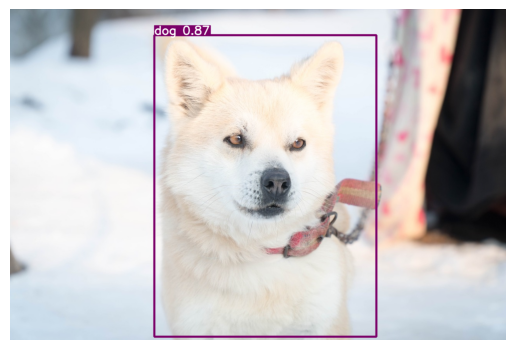

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# YOLO v8 모델 불러오기(사전 학습된 모델)
model = YOLO("yolov8n.pt")
print(model.names)
print(len(model.names), type(model.names))

# 이미지 불러오기
image2 = cv2.imread("/content/drive/MyDrive/project/steel_data/images/images/crease/img_01_3436789500_00004.jpg")
image = cv2.imread("/content/drive/MyDrive/source/dog1.jpg")

# 객체 탐지 conf: 0.5는 50% 이상의 신뢰도
result = model.predict(source=image, save=False, save_txt=False, conf=0.5)

# 탐지 결과 시각화
annotated_frame = result[0].plot()

# OpenCV에서 BGR로 불러왔으므로 RGB로 변환함
annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(annotated_frame_rgb)
plt.axis("off")
plt.show()


### 데이터셋 다운로드

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ba8WXtkaDqnyDqFnlHbR")
project = rf.workspace("hamdi-ali-akgungor").project("steel-defects-xbfez")
version = project.version(3)
dataset = version.download("coco")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Steel-Defects-3 in coco:: 100%|██████████| 2302/2302 [00:00<00:00, 5630.94it/s]


### 데이터 파일 위치 수정

In [ ]:
import shutil

# 새로운 경로로 파일 이동
shutil.move('/content/Steel-Defects-3', '/content/drive/MyDrive/project/steel_defect_data')

# 또는 파일 복사 (원본을 유지하고 싶다면)
# shutil.copytree('/content/Steel-Defects-3', '/content/new_location/Steel-Defects-3')


'/content/drive/MyDrive/project/steel_defect_data/Steel-Defects-3'

### 모델 저장을 위해 위치 수정

In [ ]:
shutil.move('/content/yolov8n.pt', '/content/drive/MyDrive/project/steel_defect_data/Steel-Defects-3')


'/content/drive/MyDrive/project/steel_defect_data/Steel-Defects-3/yolov8n.pt'

### 데이터셋 위치 지정

In [ ]:
dataset_location = "/content/drive/MyDrive/project/steel_defect_data/Steel-Defects-3"

In [ ]:
# train: "/content/drive/MyDrive/project/steel_defect_data/Steel-Defects-3/train"
# val: "/content/drive/MyDrive/project/steel_defect_data/Steel-Defects-3/valid"

# nc: 12  # 클래스 수
# names: ['10_yaozhe', '10_yaozhed', '1_chongkong', '2_hanfeng', '3_yueyawan', '4_shuiban', '5_youban', '6_siban', '7_yiwu', '8_yahen', '9_zhehen', 'd']

In [1]:
# 학습 모드: 탐지, 데이터 경로 지정, 에포크 30, 이미지 크기 640, 모델 yolov8n.pt
# !yolo task=detect mode=train data=/content/drive/MyDrive/project/steel_defect_data/Steel-Defects-3/data.yaml epochs=30 imgsz=640 model=yolov8n.pt

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ba8WXtkaDqnyDqFnlHbR")
project = rf.workspace("park-sung-ho").project("gc10-det_object-detection")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.100, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to GC10-DET_object-detection-1 in yolov8:: 100%|██████████| 4600/4600 [00:01<00:00, 3250.36it/s]


In [ ]:
print(dataset.location)

/content/GC10-DET_object-detection-1


In [2]:
# shutil.copytree('/content/GC10-DET_object-detection-1', '/content/drive/MyDrive/project/steel_yolo_data')

### 관련 모듈 설치

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 46.0 MB/s eta 0:00:00


In [ ]:
"""
task=detect: 객체 탐지(Task)를 설정 다른 옵션으로 classify(분류), segment(세그멘테이션)
mode=train: 학습 모드를 설정 다른 모드로 predict, val, export
data=path/to/data.yaml: 데이터셋의 구성 정보를 포함하는 data.yaml 파일 경로.
epochs=30: 학습할 에포크 수.
imgsz=640: 입력 이미지 크기 (픽셀).
model=yolov8n.pt: 사용할 사전 학습된 모델 경로.
batch: 배치 크기 (default는 16).
"""

In [ ]:
"""
Epoch: 현재 진행 중인 에폭과 전체 에폭 수를 나타냅니다 (예: 13/30).
GPU_mem: 훈련에 사용된 GPU 메모리 양 (GB).
box_loss: 객체 경계 상자 예측의 손실.
cls_loss: 객체 분류의 손실.
dfl_loss: 배포 포컬 손실(DFL), 경계 상자 회귀의 품질 향상에 사용.
Instances: 처리된 이미지에서 감지된 객체 수.
Size: 입력 이미지 크기 (여기서 640x640).
P (Precision): 모델의 정밀도.
R (Recall): 모델의 재현율.
mAP50, mAP50-95: 다양한 IoU 임계값에서의 평균 정확도.
"""

In [ ]:
!yolo task=detect mode=train data=/content/drive/MyDrive/project/steel_yolo_data/data.yaml epochs=30 imgsz=640 model=yolov8n.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 267MB/s]
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/project/steel_yolo_data/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True

In [ ]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/project

### 결함 탐지 예시 확인

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/project/best.pt')
results = model.predict(source='/content/drive/MyDrive/project/steel_yolo_data/train/images/img_01_3402617700_01009_jpg.rf.dbc9ad3c4739415d9d5eeb06f1f86a5d.jpg')

# 리스트의 첫 번째 결과에 대해 시각화
results[0].plot()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/project/steel_yolo_data/train/images/img_01_3402617700_01009_jpg.rf.dbc9ad3c4739415d9d5eeb06f1f86a5d.jpg: 320x640 1 2_hanfeng, 1 3_yueyawan, 88.4ms
Speed: 10.6ms preprocess, 88.4ms inference, 796.4ms postprocess per image at shape (1, 3, 320, 640)


array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [71, 71, 71]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [70, 70, 70]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [70, 70, 70]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [98, 98, 98],
        [96, 96, 96],
        [94, 94, 94]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [96, 96, 96]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [96, 96, 96],
        [97, 97, 97],
        [98, 98, 98]]], dtype=uint8)

### 분석 결과 시각화 1

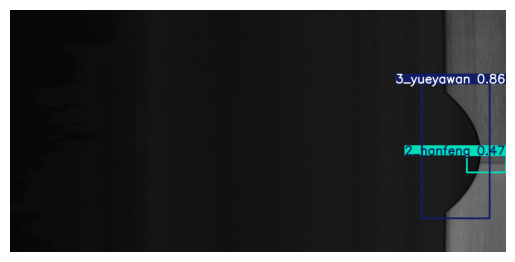

In [ ]:

import matplotlib.pyplot as plt
import cv2

# 예측 결과 중 첫 번째 이미지를 가져와 시각화
annotated_img = results[0].plot()  # 이미지에 탐지된 객체를 그리기

# OpenCV 이미지를 Matplotlib으로 시각화하기 위해 RGB로 변환
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(annotated_img_rgb)
plt.axis('off')  # 축 없애기
plt.show()

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/project/best2.pt source=/content/drive/MyDrive/project/steel_data/images/images/welding_line/img_01_425391600_00018.jpg

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/project/steel_data/images/images/welding_line/img_01_425391600_00018.jpg: 320x640 1 2_hanfeng, 1 3_yueyawan, 55.9ms
Speed: 13.0ms preprocess, 55.9ms inference, 805.3ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


### 학습 모델 변경 후 예측 수행

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/project/best2.pt')

results = model.predict(
    '/content/drive/MyDrive/project/steel_data/images/images/welding_line/img_01_425391600_00018.jpg',
    save=False,
    imgsz=640,
    conf=0.5,
    device="cuda",
)
for r in results:
    print(r.boxes)


image 1/1 /content/drive/MyDrive/project/steel_data/images/images/welding_line/img_01_425391600_00018.jpg: 320x640 1 2_hanfeng, 1 3_yueyawan, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 3.], device='cuda:0')
conf: tensor([0.6806, 0.5371], device='cuda:0')
data: tensor([[6.1450e+02, 2.1759e+02, 8.5651e+02, 7.4373e+02, 6.8058e-01, 4.0000e+00],
        [7.7051e+02, 4.2721e+02, 2.0272e+03, 5.2080e+02, 5.3714e-01, 3.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1000, 2048)
shape: torch.Size([2, 6])
xywh: tensor([[ 735.5061,  480.6641,  242.0090,  526.1414],
        [1398.8472,  474.0043, 1256.6676,   93.5950]], device='cuda:0')
xywhn: tensor([[0.3591, 0.4807, 0.1182, 0.5261],
        [0.6830, 0.4740, 0.6136, 0.0936]], device='cuda:0')
xyxy: tensor([[ 614.5016,  217.5934,  856.5106,  743.7348],
        [ 770.5133,  427.2068, 2027.1809,  

### 학습 라벨을 CNN에서 사용한 라벨로 변환

In [ ]:
"""
xywh: 중심 좌표 (x, y)와 폭(w), 높이(h)로 표현된 경계 상자.

예: [x_center, y_center, width, height]
xywhn: 정규화된 xywh 값으로, 이미지 크기에 맞춰 (0, 1) 범위로 조정된 좌표.

xyxy: 왼쪽 상단과 오른쪽 하단의 좌표 (x1, y1, x2, y2)로 표현된 경계 상자.

xyxyn: 정규화된 xyxy 값으로, 이미지 크기에 맞춰 (0, 1) 범위로 조정된 좌표.
"""
for r in results:
    boxes = r.boxes.xyxy

    for box in boxes:
        print(box)

print(r.names)
r.names={0: 'yaozhe', 1:'waist folding', 2:'punching hole', 3:'welding line', 4:'crescent gap', 5:'water spot', 6:'oil spot', 7:'silk spot', 8:'inclusion', 9:'rolled pit', 10:'crease', 11:'d'}

print(r.names)

tensor([614.5016, 217.5934, 856.5106, 743.7348], device='cuda:0')
tensor([ 770.5133,  427.2068, 2027.1809,  520.8018], device='cuda:0')
{0: '10_yaozhe', 1: '10_yaozhed', 2: '1_chongkong', 3: '2_hanfeng', 4: '3_yueyawan', 5: '4_shuiban', 6: '5_youban', 7: '6_siban', 8: '7_yiwu', 9: '8_yahen', 10: '9_zhehen', 11: 'd'}
{0: 'yaozhe', 1: 'waist folding', 2: 'punching hole', 3: 'welding line', 4: 'crescent gap', 5: 'water spot', 6: 'oil spot', 7: 'silk spot', 8: 'inclusion', 9: 'rolled pit', 10: 'crease', 11: 'd'}


### 박스를 그리기 위한 전처리 과정

In [ ]:
for r in results:
    image_path = r.path # 현재 이미지의 path
    boxes = r.boxes.xyxy # 현재 이미지의 bbox의 xy좌표값들
    cls = r.boxes.cls # 현재 이미지의 bbox의 class들
    conf = r.boxes.conf # 현재 이미지의 bbox의 conf값
    cls_dict = r.names # 지금 예제는 {0: 'joint', 1: 'side'}

    # boxes, cls, conf 개수는 같기 때문에 zip으로 한번 묶어준다
    for box, cls_number, conf in zip(boxes, cls, conf):
        conf_number = float(conf.item())
        cls_number_int = int(cls_number.item())
        cls_name = cls_dict[cls_number_int]
        x1, y1, x2, y2 = box
        x1_int = int(x1.item())
        y1_int = int(y1.item())
        x2_int = int(x2.item())
        y2_int = int(y2.item())
        print(x1_int, y1_int, x2_int, y2_int, cls_name)

614 217 856 743 crescent gap
770 427 2027 520 welding line


### 분석 결과 시각화 2

614 217 856 743 crescent gap
770 427 2027 520 welding line


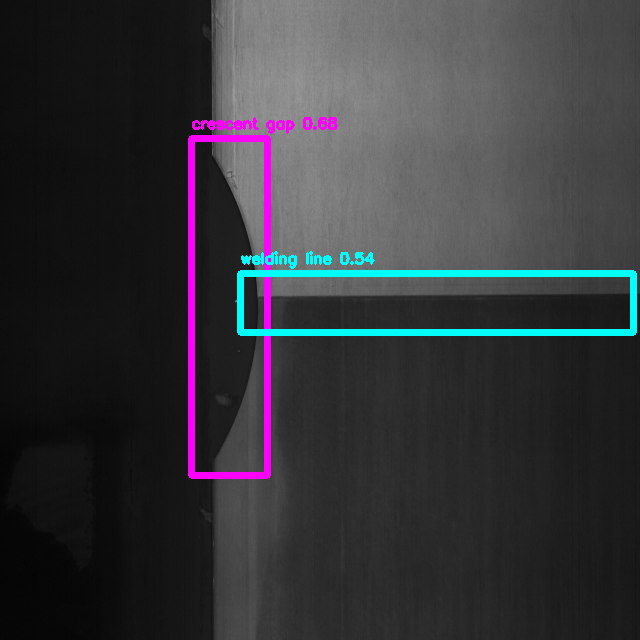

In [ ]:
# bfrom google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import random


# 클래스별 색상 설정 (랜덤 색상으로)
# 클래스별 색상 사전 정의
color_dict = {
    0: (255, 0, 0),   # yaozhe - 빨강
    1: (0, 255, 0),   # waist folding - 초록
    2: (0, 0, 255),   # punching hole - 파랑
    3: (255, 255, 0), # welding line - 노랑
    4: (255, 0, 255), # crescent_gap - 핑크
    5: (0, 255, 255), # water spot - 청록
    6: (128, 0, 128), # oil spot - 보라
    7: (128, 128, 0), # silk spot - 올리브
    8: (0, 128, 128), # inclusion - 청록
    9: (128, 128, 128),# rolled pit - 회색
    10: (0, 0, 0),    # crease - 검정
    11: (192, 192, 192) # d - 은색
}

for r in results:
    image_path = r.path # 현재 이미지의 path
    boxes = r.boxes.xyxy # 현재 이미지의 bbox의 xy좌표값들
    cls = r.boxes.cls # 현재 이미지의 bbox의 class들
    conf = r.boxes.conf # 현재 이미지의 bbox의 conf값
    cls_dict = r.names # 지금 예제는 {0: 'joint', 1: 'side'}

    import cv2

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape

    image = cv2.resize(image, (640, 640)) # 출력할 이미지 사이즈 조정

    for box, cls_number, conf in zip(boxes, cls, conf):
        conf_number = float(conf.item())
        cls_number_int = int(cls_number.item())
        cls_name = cls_dict[cls_number_int]
        x1, y1, x2, y2 = box
        x1_int = int(x1.item())
        y1_int = int(y1.item())
        x2_int = int(x2.item())
        y2_int = int(y2.item())
        print(x1_int, y1_int, x2_int, y2_int, cls_name)

        # 사각형과 텍스트 색상 설정
        box_color = color_dict[cls_number_int]
        text_color = color_dict[cls_number_int]

        # 이미지에 라벨(클래스 이름) 추가
        label = f"{cls_name} {conf_number:.2f}"  # 클래스 이름과 신뢰도

        # 출력할 이미지 사이즈를 조정했기 때문에 좌표값도 같이 조정 한다
        scale_factor_x = 640 / w
        scale_factor_y = 640 / h
        x1_scale = int(x1_int * scale_factor_x)
        y1_scale = int(y1_int * scale_factor_y)
        x2_scale = int(x2_int * scale_factor_x)
        y2_scale = int(y2_int * scale_factor_y)

        image = cv2.rectangle(
            image, (x1_scale, y1_scale), (x2_scale, y2_scale), box_color, 6
        )
        # 텍스트 추가 (x1_scale, y1_scale 위에 표시)
        """
        image: 텍스트를 그릴 이미지 객체.
        label: 표시할 텍스트 (클래스 이름과 신뢰도).
        (x1_scale, y1_scale - 10): 텍스트를 시작할 위치. x1_scale은 x 좌표, y1_scale - 10은 y 좌표에서 텍스트가 상단에 위치하도록 조정.
        cv2.FONT_HERSHEY_PLAIN: 사용 폰트. 여기서는 단순한 기본 폰트.
        0.5: 텍스트 크기(scale factor).
        text_color: 텍스트 색상 (BGR 형식, 예: (255, 0, 0)은 빨강).
        2: 텍스트 두께.
        """
        image = cv2.putText(
            image, label, (x1_scale, y1_scale - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2
        )

    # cv2.imwrite("./test.jpg", image) # 이미지 저장
    cv2_imshow(image)
    cv2.waitKey(0)

### 기존 코드와 동일 - 데이터만 변경해서 반복 수행

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ba8WXtkaDqnyDqFnlHbR")
project = rf.workspace("deepti-kymh1").project("gc10-det-new")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.100, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to GC10-DET-new-2 in yolov8:: 100%|██████████| 4246/4246 [00:00<00:00, 9251.11it/s]


In [ ]:
print(dataset.location)

/content/GC10-DET-new-2


In [ ]:
import shutil

shutil.move('/content/GC10-DET-new-2', '/content/drive/MyDrive/project/steel_defect_data_eng')

'/content/drive/MyDrive/project/steel_defect_data_eng'

In [ ]:
dataset_location = "/content/drive/MyDrive/project/steel_yolo_data_eng"


In [ ]:
"""
Conv: 합성곱 연산을 통해 이미지의 특징을 추출하는 일반적인 CNN 레이어입니다.
C2f (Cross Stage Partial Networks): 효율적인 피드포워드 연산을 제공하는 구조로, 모델의 깊이를 증가시키면서도 계산 복잡도를 줄입니다.
SPPF (Spatial Pyramid Pooling - Fast): 다중 스케일의 정보를 압축하여 계산 속도를 높이면서도 중요한 특징을 유지하는 풀링 연산입니다.
Concat: 여러 특성 맵을 결합하는 연산으로, 이 과정에서 네트워크가 서로 다른 해상도의 특징을 동시에 고려할 수 있게 합니다.
Detect: 마지막 출력 레이어로, 객체의 클래스와 경계 상자를 예측하는 부분입니다. 여기서 [10, [64, 128, 256]]은 10개의 클래스를 예측하며, 3가지 다른 크기의 특성 맵에서 예측을 진행함을 나타냅니다 (즉, 64, 128, 256 차원의 피쳐맵에서 탐지).
"""

In [ ]:
"""
mAP50 는 객체 탐지 모델의 성능을 측정하는 주요 지표 중 하나입니다.
이 값은 모델이 예측한 경계 상자와 실제 경계 상자 간의 일치도를 평가합니다.

mAP는 평균 정밀도를 나타내며, 0.50은 IoU (Intersection over Union) 임계값을 50%로 설정한 것을 의미합니다.
 즉, 예측된 경계 상자와 실제 경계 상자가 50% 이상 겹치면 '정확한 예측'으로 간주됩니다.
0.147는 모델의 성능이라는 것을 의미합니다. 더 높은 값일수록 모델의 성능이 더 좋다는 것을 나타냅니다.
"""

In [ ]:
!yolo task=detect mode=train data=/content/drive/MyDrive/project/steel_yolo_data_eng/data.yaml epochs=50 imgsz=640 model=yolov8n.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 27.0MB/s]
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/project/steel_yolo_data_eng/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val

In [ ]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/project


image 1/1 /content/drive/MyDrive/project/steel_data/images/images/crease/img_01_3436789500_00004.jpg: 320x640 2 9_zhehens, 7.7ms
Speed: 1.7ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


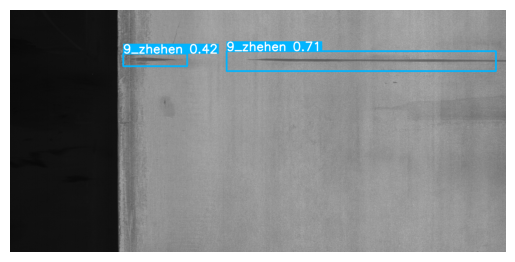

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/project/best2.pt')
results = model.predict(source='/content/drive/MyDrive/project/steel_data/images/images/crease/img_01_3436789500_00004.jpg')

# 리스트의 첫 번째 결과에 대해 시각화
results[0].plot()
import matplotlib.pyplot as plt
import cv2

# 예측 결과 중 첫 번째 이미지를 가져와 시각화
annotated_img = results[0].plot()  # 이미지에 탐지된 객체를 그리기

# OpenCV 이미지를 Matplotlib으로 시각화하기 위해 RGB로 변환
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(annotated_img_rgb)
plt.axis('off')  # 축 없애기
plt.show()

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/project/best2.pt')

results = model.predict(
    '/content/drive/MyDrive/project/steel_data/images/images/welding_line/img_01_425391600_00018.jpg',
    save=False,
    imgsz=640,
    conf=0.5,
    device="cuda",
)
for r in results:
    print(r.boxes)

for r in results:
    boxes = r.boxes.xyxy

    for box in boxes:
        print(box)

print(r.names)
r.names={0: 'yaozhe', 1:'waist folding', 2:'punching hole', 3:'welding line', 4:'crescent gap', 5:'water spot', 6:'oil spot', 7:'silk spot', 8:'inclusion', 9:'rolled pit', 10:'crease', 11:'d'}

print(r.names)